In [1]:
# # %pwd
# %cd drive/MyDrive/'stuff after the mission'/'Fall 23'/'ECEN 758'

In [1]:
import data_loader_utility as dlu
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
train_dl, test_dl, val_dl = dlu.get_dataloaders()

In [4]:
X_train, X_test, y_train, y_test = dlu.get_tabular_data()

## 2 (a) Descriptive Statistics (e.g., class distributions, data statistics)

In [5]:
from matplotlib.ticker import MaxNLocator

Text(0, 0.5, '% of dataset made up by each class')

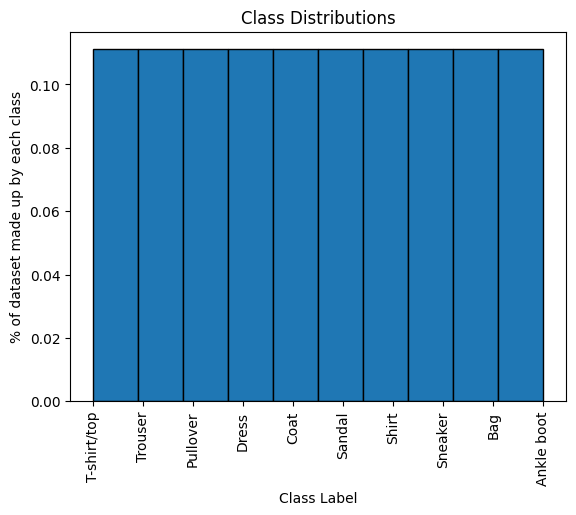

In [6]:
all_labels = np.concatenate([np.array(X_test), np.array(y_test)])
fig, ax = plt.subplots()
ax.hist(all_labels, density=True, edgecolor='black')
ax.set_title('Class Distributions')
ax.set_xlabel('Class Label')
ax.set_xticks(ticks=list(dlu.label_dict.keys()),  # TODO -- FIX THE XTICKS/LABELS
              labels=list(dlu.label_dict.values()),
              rotation=90)
ax.set_ylabel('% of dataset made up by each class')

## Use a pretrained ResNet50 neural network to create a feature vector for each image to use to train an XGBoost model

###### References: https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18

In [7]:
# from torchvision import models
# rn50 =  models.resnet50(weights='ResNet50_Weights.DEFAULT')
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# # children_counter = 0
# # for n,c in rn50.named_children():
# #     print("Children Counter: ",children_counter," Layer Name: ",n,)
# #     children_counter+=1

In [9]:
# feature_extractor = torch.nn.Sequential(*list(rn50.children())[:-1])

In [10]:
# import torch.nn as nn
# class CustomResNet50(nn.Module):
#     def __init__(self, num_classes):
#         super(CustomResNet50, self).__init()
#         # Load the pre-trained ResNet-50 model
#         self.resnet50 = models.resnet50(pretrained=True)

#         # Modify the first layer to accept 28x28 images
#         self.resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

#         # Modify the average pooling layer to adapt to the new input size
#         self.resnet50.avgpool = nn.AdaptiveAvgPool2d(1)

#         # Modify the final fully connected layer to match the number of output classes
#         self.resnet50.fc = nn.Linear(2048, num_classes)

#     def forward(self, x):
#         return self.resnet50(x)


In [11]:
# x = torch.randn([1,3,27,27])
# custom_resnet = CustomResNet50(num_classes=10)

In [12]:

# x = torch.randn([1,3,27,27])
# # output = feature_extractor(x)
# # output.to(device)

In [13]:
# train_dl, test_dl, val_dl = dlu.get_dataloaders('data/fashion')

In [14]:
device

'cpu'

Building a model based on this model [here](https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/).

In [15]:
# import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

# transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
# testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

class HomemadeCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 28, kernel_size=3, stride=1, padding=1)  # review wht the different channels are (andrew ng)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        # self.drop1 = nn.Dropout(0.3)

        self.conv2 = nn.Conv2d(28, 14, kernel_size=3, stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        # new convolutionl layer
        # self.conv3 = nn.Conv2d(14, 7, kernel_size=3, stride=1, padding=1)
        # self.act3 = nn.ReLU()
        # self.pool3 = nn.MaxPool2d(kernel_size=2)

        # batchnorm dded
        # self.bn1 = nn.BatchNorm2d()  # how does this value affect the later layers, accuracy, etc.?

        self.flat = nn.Flatten()
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x3388 and 343x343)
        self.fc4 = nn.Linear(14*7*7, 343)
        self.act4 = nn.ReLU()
        self.drop4 = nn.Dropout(0.2)

        self.fc5 = nn.Linear(343, 10)

    def forward(self, x):
        # input 3x32x32, output 32x32x32
        # print(x.shape, 'original')
        x = self.act1(self.conv1(x))
        x = self.pool1(x)
        # print(x.shape, 'after 1st conv')
        # x = self.drop1(x)
        # print(x.shape, 'after dropout')
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # print(x.shape, 'after 2nd conv')
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # print(x.shape, 'after 1st maxpool')
        # new conv layer
        # x = self.act3(self.conv3(x))
        # print(x.shape, 'after 3rd conv')
        # x = self.pool3(x)
        # print(x.shape, 'after 2nd pool')
        # input 32x16x16, output 8192
        x = self.flat(x)
        # print(x.shape, 'after flattening')
        # input 8192, output 512
        x = self.act4(self.fc4(x))
        x = self.drop4(x)
        # input 512, output 10
        x = self.fc5(x)
        return x


In [16]:
### TODO -- get the features out
### TODO -- fit an xgboost model
### TODO -- inspect the model performance metrics
### TODO -- tey out-of-sample predictions

model_ = HomemadeCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_.parameters(), lr=0.001, momentum=0.9)

n_epochs = 30  # experiment with adjusting this
for epoch in range(n_epochs):
    for inputs, labels in train_dl:
        # forward, backward, and then weight update
        labels = labels.to(device)
        inputs = inputs.to(device)
        y_pred = model_(inputs)#.to(device)
        loss = loss_fn(y_pred, labels)

        # double check what these are doing
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in val_dl:
        labels = labels.to(device)
        inputs = inputs.to(device)
        y_pred = model_(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))



Epoch 0: model accuracy 74.01%
Epoch 1: model accuracy 77.08%
Epoch 2: model accuracy 79.96%
Epoch 3: model accuracy 80.70%
Epoch 4: model accuracy 81.69%
Epoch 5: model accuracy 84.25%
Epoch 6: model accuracy 83.86%
Epoch 7: model accuracy 84.21%
Epoch 8: model accuracy 84.39%
Epoch 9: model accuracy 85.58%
Epoch 10: model accuracy 86.29%
Epoch 11: model accuracy 86.00%
Epoch 12: model accuracy 86.61%
Epoch 13: model accuracy 86.46%
Epoch 14: model accuracy 87.70%
Epoch 15: model accuracy 87.59%
Epoch 16: model accuracy 87.64%
Epoch 17: model accuracy 87.74%
Epoch 18: model accuracy 88.15%
Epoch 19: model accuracy 88.57%
Epoch 20: model accuracy 88.72%
Epoch 21: model accuracy 88.43%
Epoch 22: model accuracy 88.14%
Epoch 23: model accuracy 88.64%
Epoch 24: model accuracy 88.97%
Epoch 25: model accuracy 89.16%
Epoch 26: model accuracy 88.79%
Epoch 27: model accuracy 89.13%
Epoch 28: model accuracy 88.95%
Epoch 29: model accuracy 89.13%


In [20]:
torch.save(model_.state_dict(), "homemademodel.pth")

In [36]:
acc = 0
count = 0

with torch.no_grad():
    for inputs, labels in test_dl:
        labels = labels.to(device)
        inputs = inputs.to(device)
        y_pred = model_(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)

In [37]:
acc / count  # 90%!! not bad :) - need to vet that though

tensor(0.9003)

In [10]:
(torch.argmax(y_pred, 1) == labels).float().sum()

tensor(14.)

In [25]:
# ### TODO -- send this .to(device)!
# ### TODO -- get the features out
# ### TODO -- fit an xgboost model

# model = HomemadeCNN()#.to(device)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# n_epochs = 20
# for epoch in range(n_epochs):
#     for inputs, labels in train_dl:
#         # forward, backward, and then weight update
#         y_pred = model(inputs)#.to(device)
#         loss = loss_fn(y_pred, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     acc = 0
#     count = 0
#     for inputs, labels in val_dl:
#         y_pred = model(inputs)
#         acc += (torch.argmax(y_pred, 1) == labels).float().sum()
#         count += len(labels)
#     acc /= count
#     print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

# # torch.save(model.state_dict(), "homemademodel.pth")

Epoch 0: model accuracy 75.46%
Epoch 1: model accuracy 76.59%
Epoch 2: model accuracy 78.47%
Epoch 3: model accuracy 80.16%
Epoch 4: model accuracy 81.84%
Epoch 5: model accuracy 83.28%
Epoch 6: model accuracy 84.21%
Epoch 7: model accuracy 84.39%
Epoch 8: model accuracy 85.39%
Epoch 9: model accuracy 85.65%
Epoch 10: model accuracy 86.17%
Epoch 11: model accuracy 86.67%
Epoch 12: model accuracy 86.91%
Epoch 13: model accuracy 86.86%
Epoch 14: model accuracy 87.31%
Epoch 15: model accuracy 87.79%
Epoch 16: model accuracy 87.72%
Epoch 17: model accuracy 88.25%
Epoch 18: model accuracy 88.11%
Epoch 19: model accuracy 88.50%


In [26]:
# feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

In [28]:
# feature_extractor[8]

ReLU()